<a href="https://colab.research.google.com/github/joaoipiraja/AI-Auto-Enconder/blob/main/deepAutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Model,Sequential
from keras.layers import Input,Dense
from keras.utils import np_utils

In [2]:
(previsores_treinamento,classe_treinamento), (previsores_teste,classe_teste) = mnist.load_data()

In [3]:
previsores_treinamento = previsores_treinamento.astype('float32')/255
previsores_teste = previsores_teste.astype('float32')/255
previsores_treinamento = previsores_treinamento.reshape(len(previsores_treinamento), np.prod(previsores_treinamento.shape[1:]))
previsores_teste = previsores_teste.reshape(len(previsores_teste), np.prod(previsores_teste.shape[1:]))

In [37]:
def reduzirInformacaoComDeepAutoEnconder(tamanho,previsores):
    #Ex: 784 -> 128 -> 64 -> 32 -> 64 -> 128 -> 784

    numeroNeuroniosEntrada = previsores[0].shape[1]
    numeroNeuroniosSaida = previsores[0].shape[1]
    numeroNeuroniosCamadaOculta = tamanho

    lista_num_neuronios_camada_oculta = []
    lista_num_neuronios_camada_oculta.append(tamanho)
    resultado = 0

    while resultado <= numeroNeuroniosEntrada :
          ultimo = len(lista_num_neuronios_camada_oculta)-1
          resultado = lista_num_neuronios_camada_oculta[ultimo]*2
          if(resultado <= numeroNeuroniosEntrada):
            lista_num_neuronios_camada_oculta.append(resultado)
    
    autoencoder = Sequential()
    numeroNeuroniosCamadaOculta = lista_num_neuronios_camada_oculta[len(lista_num_neuronios_camada_oculta) - 1]
    print(numeroNeuroniosCamadaOculta,numeroNeuroniosEntrada)
    autoencoder.add(Dense(units= numeroNeuroniosCamadaOculta, activation='relu', input_dim = numeroNeuroniosEntrada))

    print(lista_num_neuronios_camada_oculta)

    #Codifica
    for i in range(len(lista_num_neuronios_camada_oculta)-2, -1,-1):
        numeroNeuroniosCamadaOculta = lista_num_neuronios_camada_oculta[i]
        print(i, numeroNeuroniosCamadaOculta)
        autoencoder.add(Dense(units= numeroNeuroniosCamadaOculta, activation='relu'))
        
    #Decodifica
    for i in range(1,len(lista_num_neuronios_camada_oculta)):
        numeroNeuroniosCamadaOculta = lista_num_neuronios_camada_oculta[i]
        print(i, numeroNeuroniosCamadaOculta)
        autoencoder.add(Dense(units= numeroNeuroniosCamadaOculta, activation='relu'))

    autoencoder.add(Dense(units= numeroNeuroniosSaida, activation='sigmoid'))
    
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    autoencoder.fit(previsores[0],previsores[0],epochs=50,batch_size = 256, validation_data = (previsores[1],previsores[1]))

    dimensao_original = Input(shape = (numeroNeuroniosEntrada,))
    lista_camada_encoder = []

    aux = autoencoder.layers[0](dimensao_original)
    print(0,"Input")
    for i in range(1,len(lista_num_neuronios_camada_oculta)):
        print(i,i-1)
        aux = autoencoder.layers[i](aux)
    encoder = Model(dimensao_original, aux)
    return (encoder,autoencoder)

In [ ]:
encoder, autoencoder = reduzirInformacaoComDeepAutoEnconder(8,10,(previsores_treinamento, previsores_teste))

In [39]:
imagensCodificadas = encoder.predict(previsores_teste)
imagensDecodificadas = autoencoder.predict(previsores_teste)

In [40]:
imagensCodificadas.shape

(10000, 8)

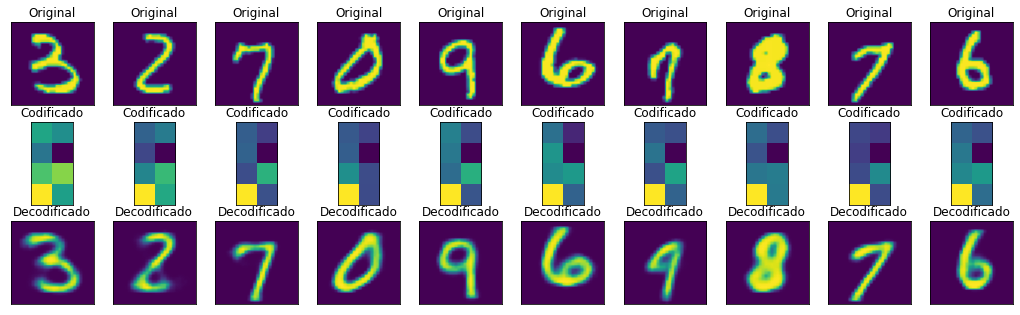

In [35]:
numeroImagens = 10
imagensTeste = np.random.randint(previsores_teste.shape[0], size = numeroImagens) #Seleciona 10 imagens no intervalo de previsores_teste.shape[0]
plt.figure(figsize=(18,18))
for i, indiceImagem in enumerate(imagensTeste):
    eixo = plt.subplot(10,10,i+1) #linhas,colunas,indice para imagem
    plt.title("Original")
    plt.imshow(previsores_teste[indiceImagem].reshape(28,28))
    plt.xticks(()) #Remove eixo x
    plt.yticks(()) #Remove eixo y

    eixo = plt.subplot(10,10,i+1+numeroImagens) #linhas,colunas,indice para imagem
    plt.title("Codificado")
    plt.imshow(imagensCodificadas[indiceImagem].reshape(4,2))
    plt.xticks(()) #Remove eixo x
    plt.yticks(()) #Remove eixo y

    eixo = plt.subplot(10,10,i+1+numeroImagens*2) #linhas,colunas,indice para imagem
    plt.title("Decodificado")
    plt.imshow(imagensDecodificadas[indiceImagem].reshape(28,28))
    plt.xticks(()) #Remove eixo x
    plt.yticks(()) #Remove eixo y